**Name:Yashodeep Narendra Sonar**
**Project Title: Stock-Market Analysis**
---
The "Stock-Market" project aims to analyze and compare the historical stock prices of Apple, Microsoft, Netflix, and Google over the past three months. Utilizing Python, SQL, machine learning, and Excel, the project seeks to identify trends, calculate moving averages, assess volatility, and conduct correlation analysis among the companies' stock performances. The comprehensive approach involves defining objectives, collecting and preparing data, performing exploratory data analysis (EDA), feature engineering, selecting appropriate machine learning models, training and evaluating these models, and final deployment.


# Step 1: Import Necessary Libraries
**pandas**: For data manipulation and analysis.

**numpy**: For numerical computations.

**matplotlib**.pyplot: For data visualization.

**seaborn**: For enhanced data visualizations.

**sklearn**: For implementing machine learning models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Step 2: Data Collection
The dataset is loaded from a CSV file, where we can view the first few entries to understand its structure.

In [ ]:
data = pd.read_csv('stocks.csv')
print(data.head())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


# Step 3: Data Preparation
**dropna()**: Removes any rows with missing values to ensure clean data.

**pd.to_datetime()**: Converts the 'Date' column from string format to datetime objects for time-series analysis

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.dropna(inplace=True)

In [ ]:
data = pd.get_dummies(data, columns=['Ticker'], drop_first=True)

# Step 4: Exploratory Data Analysis (EDA)
A histogram is plotted to visualize the distribution of closing prices, which helps in understanding data ranges and frequencies.

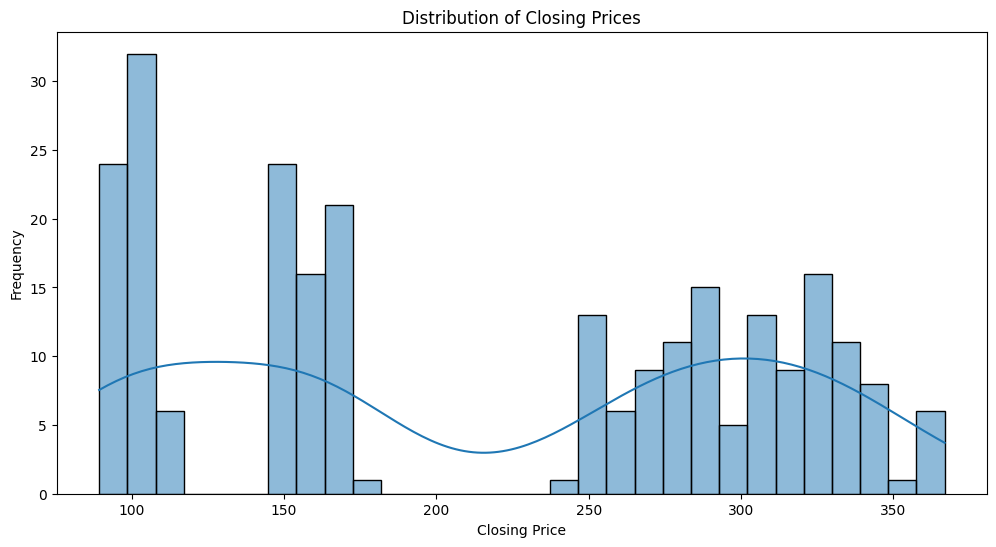

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Close'], bins=30, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# Step 5: Correlation Analysis
A correlation matrix is generated to observe relationships between various stock prices, helping identify any potential dependencies.

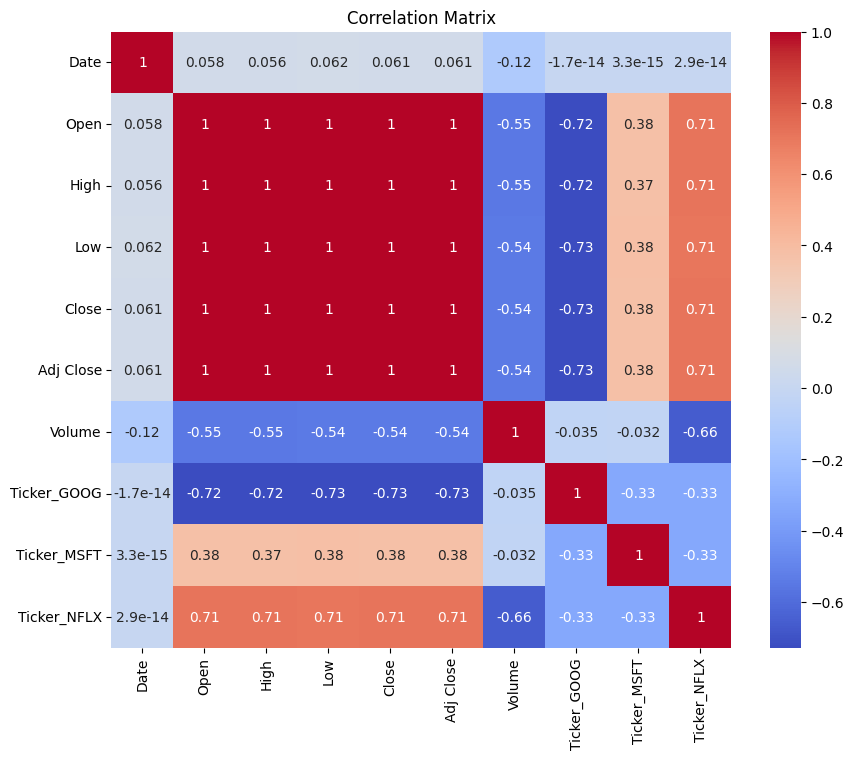

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 6: Feature Engineering
The target variable 'Close' is separated from the features, ensuring a focus on relevant data for modeling.

In [ ]:
X = data.drop(['Date', 'Close'], axis=1)
y = data['Close']

#Step 7: Data Standardization
StandardScaler: Normalizes the feature data, which is crucial for many machine learning models to perform accurately.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Train-Test Split and model Training
**train_test_split**: Divides the data into training (80%) and testing (20%) sets, helping to validate model performance on unseen data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Step 9: Model Evaluation
Predictions are made on the test set, comparing the results to compute Mean Squared Error and R^2 Score, which help quantify model accuracy.

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.0500927905525483


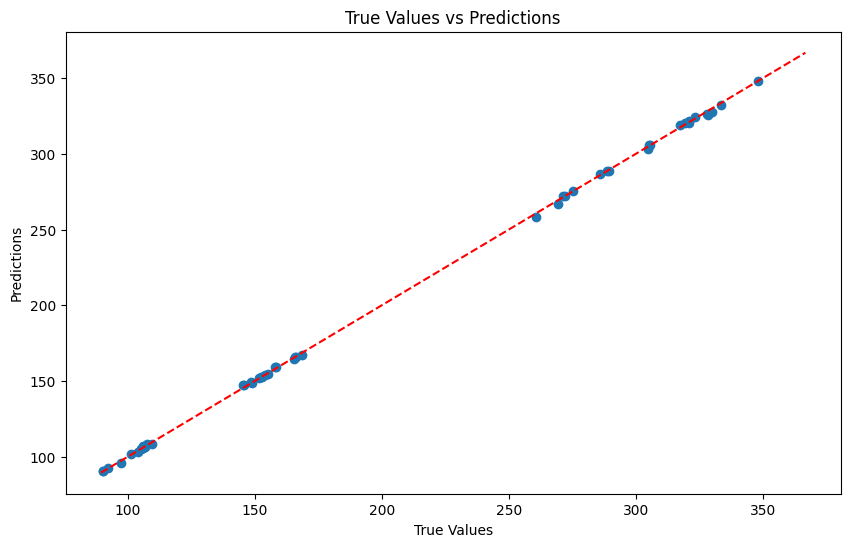

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

# Conclusion
This notebook provides a comprehensive approach to analyzing stock market data using Python. Future steps could include implementing additional machine learning techniques, such as Random Forest or Neural Networks, as well as conducting more in-depth analytical interpretations.